In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec, KeyedVectors
import nltk
import gensim

In [130]:
df = pd.read_csv('../Data/dontpatronizeme_pcl.tsv', sep = '\t', names=['id','info','country', 'text','class'] )

In [42]:
df.head()

,id,info,country,text,class
0,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


<AxesSubplot:xlabel='class', ylabel='count'>

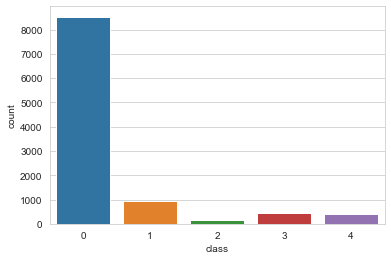

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='class',data= df)

<AxesSubplot:xlabel='info', ylabel='count'>

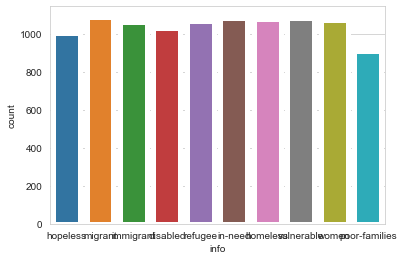

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='info',data= df, linewidth= 5)

<AxesSubplot:xlabel='class', ylabel='count'>

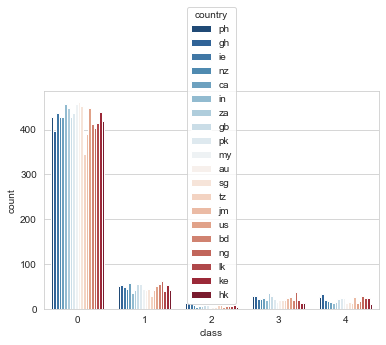

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='country',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='class', ylabel='count'>

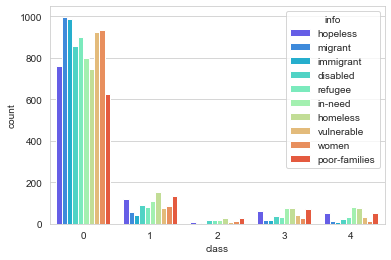

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='info',data=df,palette='rainbow')

In [8]:
df['text'].count()

10468

In [9]:
df['info'].count()



10469

In [134]:
df = df.dropna(inplace = False)

In [135]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10468 non-null  object
 1   info     10468 non-null  object
 2   country  10468 non-null  object
 3   text     10468 non-null  object
 4   class    10468 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 409.0+ KB


In [136]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
corpus =[]
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review =' '.join(review)
    corpus.append(review)
    

100%|██████████████████████████████████████████████████████████████████████████| 10468/10468 [00:05<00:00, 1859.69it/s]


In [123]:
#corpus

In [9]:
#model = Word2Vec(corpus, min_count = 1)

In [166]:
post_text =df.text.apply(gensim.utils.simple_preprocess)


In [167]:
model = gensim.models.Word2Vec(window = 10, min_count =3, workers=4)

In [153]:
model.build_vocab(corpus, progress_per = 500)

In [154]:
model.epochs

5

In [157]:
model.train(corpus, total_examples = model.corpus_count, epochs = model.epochs)

(1394465, 8188885)

In [165]:
model.wv.most_similar("living")

KeyError: "Key 'living' not present"

In [160]:
vector =model.wv['hope']

KeyError: "Key 'hope' not present"

In [161]:
model.wv.most_similar('hope')

KeyError: "Key 'hope' not present"

In [163]:
model.wv.similarity(w1="king", w2 = "queen")

KeyError: "Key 'king' not present"

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer( max_features = 1000)
#cv = TfidfVectorizer(min_df=1,stop_words='english')
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ] 

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logmodel = LogisticRegression(max_iter=1000, class_weight='balanced')
logmodel.fit(X_train, y_train_task1)
predictions = logmodel.predict(X_test)

In [126]:
accuracy = confusion_matrix(y_test_task1, predictions)
print(accuracy)

[[1560  330]
 [  95  109]]


In [127]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_task1,predictions)
accuracy

0.7970391595033429

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test_task1, predictions))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1890
           1       0.25      0.53      0.34       204

    accuracy                           0.80      2094
   macro avg       0.60      0.68      0.61      2094
weighted avg       0.87      0.80      0.83      2094



In [12]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC()

In [13]:
len(X_train)

8374

In [16]:
len(X_test)

2094

In [17]:
model.fit(X_train, y_train_task1)

SVC()

In [ ]:
model.score(X_test, y_test_task1)

In [98]:
#cv = CountVectorizer( max_features = 1000)
#cv = TfidfVectorizer(min_df=1,stop_words='english')
#X = cv.fit_transform(corpus).toarray()
#y = df.iloc[:,-1].values

In [19]:
'''cf = [i for i in range(50,1000,50)]
ac = []

for i in cf:
    cv = CountVectorizer( max_features = i)
    
    X = cv.fit_transform(corpus).toarray()
    y = df.iloc[:,-1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
   
    y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
    y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit (X_train, y_train_task1)
    
    y_pred = classifier.predict(X_test)
    print(f'feature count {i}, {accuracy_score(y_test_task1, y_pred)}')
    ac.append([i,accuracy_score(y_test_task1, y_pred)])'''
    

"cf = [i for i in range(50,1000,50)]\nac = []\n\nfor i in cf:\n    cv = CountVectorizer( max_features = i)\n    \n    X = cv.fit_transform(corpus).toarray()\n    y = df.iloc[:,-1].values\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)\n   \n    y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]\n    y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]\n    classifier = LogisticRegression(max_iter=1000)\n    classifier.fit (X_train, y_train_task1)\n    \n    y_pred = classifier.predict(X_test)\n    print(f'feature count {i}, {accuracy_score(y_test_task1, y_pred)}')\n    ac.append([i,accuracy_score(y_test_task1, y_pred)])"

In [105]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]  


from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, class_weight= 'balanced')
logmodel.fit(X_train, y_train_task1)
predictions = logmodel.predict(X_test)'''

"from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)\ny_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]\ny_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]  \n\n\nfrom sklearn.linear_model import LogisticRegression\nlogmodel = LogisticRegression(max_iter=1000, class_weight= 'balanced')\nlogmodel.fit(X_train, y_train_task1)\npredictions = logmodel.predict(X_test)"

In [106]:
'''from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test_task1, predictions)
accuracy'''

'from sklearn.metrics import confusion_matrix\naccuracy = confusion_matrix(y_test_task1, predictions)\naccuracy'

In [107]:
'''from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_task1,predictions)
accuracy'''


'from sklearn.metrics import accuracy_score\naccuracy = accuracy_score(y_test_task1,predictions)\naccuracy'

In [108]:
'''from sklearn.metrics import classification_report
print(classification_report(y_test_task1, predictions))'''

'from sklearn.metrics import classification_report\nprint(classification_report(y_test_task1, predictions))'

In [13]:
X_train.shape

(8374, 1000)

|Models|Description|Precion|Recall|weighted average F1|Accuracy F1|Remark|
|---|---|---|---|---|---|---|
|MultinomialNB|TFIDF Feature|.67|.82|.73|81.6|Highly biased|
|GaussianNB|TFIDF Feature|.70|.69|.69|68.7|partial towards class 0|
|GaussianNB|CV Feature|.75|.21|.30|21.4||
|MultinomialNB|CV Feature|.74|.76|.75|76.2|1. overall accc,pre,re is stable throughout.2.class 2 doesn,t given any weightage|
|Logistic|CV Feature|.87|.89|.88|89|CM matrix 0,0 value very in comparison to other three value|
|Logistic|TFIDF Feature|.87|.90|.86|90|Confusion matrix unevenly distributed|
|Logistic|CV Feature,weighted|.87|.80|.83|.80|cm well distributed|
|Logistic|TFIDF, Weighted|.89|.87|.88|87| Cm Well distributed|
|SVM|CV,Weighted|.88|.84|.85|84|contribution from both classes|
|SVM|TFIDF|

In [91]:
df['label']= [ 0 if (y == 1 or y == 0) else 1 for y in df['class']]
df

,id,info,country,text,class,label
0,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0,0
3,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0,0
...,...,...,...,...,...,...
10463,@@14297363,women,lk,Sri Lankan norms and culture inhibit women fro...,1,0
10464,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10465,@@20282330,in-need,ng,""" She has one huge platform , and information ...",3,1
10466,@@16753236,hopeless,in,""" Anja Ringgren Loven I ca n't find a word to ...",4,1


In [62]:
y_test_task1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


TF- IDF


In [18]:
fp = open("submitt1_Log_CV.csv", 'w')
for idx, i in enumerate(y_test_task1):
    print(f"{idx},{i}", file= fp)
    
fp.close()

In [46]:
df1= pd.read_csv("submitt1.csv")

In [53]:
len(cv.get_feature_names())


950

In [78]:
#X_train.inverse_transform(X_train[0])


Dividing dataset into train and test


In [95]:
#np.array(X_train.iloc[0])

In [90]:
len(X_train)

8374

In [88]:
len(y_train_task1)


8374

In [69]:
X_test[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
#weighted array
#wt_array =len(X_train)/(len(set(y_train_task1))*(np.bincount(y_train_task1)))

WORD2VEC

In [101]:
wt_array

array([1.])

In [71]:
import gensim
from gensim.models import Word2Vec

In [72]:
model = Word2Vec(corpus, min_count = 1)

In [45]:
post_text = df.text.apply(gensim.utils.simple_preprocess)
post_text

0        [we, re, living, in, times, of, absolute, insa...
1        [in, libya, today, there, are, countless, numb...
2        [white, house, press, secretary, sean, spicer,...
3        [council, customers, only, signs, would, be, d...
4        [just, like, we, received, migrants, fleeing, ...
                               ...                        
10463    [sri, lankan, norms, and, culture, inhibit, wo...
10464    [he, added, that, the, afp, will, continue, to...
10465    [she, has, one, huge, platform, and, informati...
10466    [anja, ringgren, loven, ca, find, word, to, de...
10467    [guinness, world, record, of, lbs, of, layer, ...
Name: text, Length: 10468, dtype: object

In [90]:
model = gensim.models.Word2Vec(window = 10, min_count =2, workers=4)

In [91]:
model.build_vocab(post_text, progress_per = 1000)

In [92]:
model.epochs

5

In [93]:
model.corpus_count

10468

In [94]:
model.train(post_text, total_examples = model.corpus_count, epochs = model.epochs)

(1644254, 2178930)

In [95]:
model.wv.most_similar("good")

[('hard', 0.9851309657096863),
 ('difficult', 0.9849143624305725),
 ('normal', 0.9845371246337891),
 ('reason', 0.9835087656974792),
 ('imagine', 0.9834811687469482),
 ('too', 0.9827722311019897),
 ('very', 0.9826493859291077),
 ('god', 0.9814605712890625),
 ('sure', 0.9808008670806885),
 ('little', 0.980336606502533)]

In [97]:
model.wv.similarity(w1 ="king", w2="women")

0.64415735